# Introduction to Persistent Homology

## 1. Overview

In this notebook we will be generate Peristence and Barcode diagrams for a
small sample of subjects, and then compute the Bottleneck distances of their
diagrams.

## 2. Computations

### 2.1 Setup

First we read our data from our csv file and set the `subject`, `sessionIndex`,
and `rep` columns as our index columns to facilitate our access of the data we
want (see documentation for
[pandas.DataFrame.loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html)
). `pd.read_csv` sets the type of the subject column as `object`, so we
explicitly declare it as `string`. The result is a DataFrame with 3 index columns
and 31 data columns. The data columns determine the dimension of our space, so
our data points will exist in $\mathbb{R}^{31}$.


In [1]:
import gudhi as gd
import pandas as pd
import matplotlib.pyplot as plt

from modules.helpers import subject_labels_in_range

In [2]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = 'serif'

typing_data = pd.read_csv('data/DSL-StrongPasswordData.csv',
                          # declare type of 'subject' column
                          dtype = {'subject' : 'string'},
                          index_col = ['subject', 'sessionIndex', 'rep'])
typing_data.head()

H.period  DD.period.t  UD.period.t     H.t  DD.t.i  \
subject sessionIndex rep                                                       
s002    1            1      0.1491       0.3979       0.2488  0.1069  0.1674   
                     2      0.1111       0.3451       0.2340  0.0694  0.1283   
                     3      0.1328       0.2072       0.0744  0.0731  0.1291   
                     4      0.1291       0.2515       0.1224  0.1059  0.2495   
                     5      0.1249       0.2317       0.1068  0.0895  0.1676   

                          UD.t.i     H.i  DD.i.e  UD.i.e     H.e  ...     H.a  \
subject sessionIndex rep                                          ...           
s002    1            1    0.0605  0.1169  0.2212  0.1043  0.1417  ...  0.1349   
                     2    0.0589  0.0908  0.1357  0.0449  0.0829  ...  0.1412   
                     3    0.0560  0.0821  0.1542  0.0721  0.0808  ...  0.1621   
                     4    0.1436  0.1040  0.2038  0.0998  0.0900  ...  0.1457   
                     5    0.0781  0.0903  0.1589  0.0686  0.0805  ...  0.1312   

                          DD.a.n  UD.a.n     H.n  DD.n.l  UD.n.l     H.l  \
subject sessionIndex rep                                                   
s002    1            1    0.1484  0.0135  0.0932  0.3515  0.2583  0.1338   
                     2    0.2558  0.1146  0.1146  0.2642  0.1496  0.0839   
                     3    0.2332  0.0711  0.1172  0.2705  0.1533  0.1085   
                     4    0.1629  0.0172  0.0866  0.2341  0.1475  0.0845   
                     5    0.1582  0.0270  0.0884  0.2517  0.1633  0.0903   

                          DD.l.Return  UD.l.Return  H.Return  
subject sessionIndex rep                                      
s002    1            1         0.3509       0.2171    0.0742  
                     2         0.2756       0.1917    0.0747  
                     3         0.2847       0.1762    0.0945  
                     4         0.3232       0.2387    0.0813  
                     5         0.2517       0.1614    0.0818  

[5 rows x 31 columns]

### 2.2 Simplicial Complexes and Persistence

Next, we generate 
[Vietoris-Rips complexes](https://en.wikipedia.org/wiki/Vietoris–Rips_complex)
and their respective simplex trees for each subject's typing data, and then
we calculate the persistence. Due to our hardware limitations,
we only compute the first three homologies at a maximum edge length of 0.8.


In [3]:
max_edge_length = 0.8
max_dim = 3

We don't want the index columns when creating our simplicial complexes, so we
use `values` on our `DataFrame`s to strip them out.

In [4]:
gd.RipsComplex(typing_data.loc['s002'].values,
               max_edge_length=max_edge_length).create_simplex_tree(max_dimension=max_dim).num_simplices()

473739740

As we can see, this simplex tree alone has 473,739,740 simplices. To make this
notebook more time and
space efficient, we calculate and save the persistence intervals to our data
directory as `{subject label}_persistence.txt` so that they can be loaded
instead of recomputed. The subjects `s006`, `s009`, `s014`, `s023`, and `s045`
are missing, so we use the helper function `subject_labels_in_range` to
generate the labels. The code below is commented out since the persitence intervals
have already been computed.

In [5]:
# for subject_label in subject_labels_in_range(2,57):
#     simplex_tree = gd.RipsComplex(typing_data.loc[subject_label].values,
#                                   max_edge_length=max_edge_length).create_simplex_tree(max_dimension=max_dim)
#     simplex_tree.compute_persistence()
#     simplex_tree.write_persistence_diagram(f"data/{subject_label}_persistence.txt")

Now we load our precomputed persitence diagram data

In [6]:
subjects_persistence_diagram_data = []

for label in subject_labels_in_range(2, 57):
    persistence_dict = gd.reader_utils.read_persistence_intervals_grouped_by_dimension(f"data/{label}_persistence.txt")
    subjects_persistence_diagram_data.append(persistence_dict)

and turn them into persistence diagrams

In [7]:
persistence_diagrams = []

for data in subjects_persistence_diagram_data:
    diagram = []
    for k, v in data.items():
        diagram.extend(list(map(lambda x: [k, x], v)))
    persistence_diagrams.append(diagram)

Now we plot the persistence diagrams. As you can see form the legend in the
diagrams, the red dots represent the 0th homology, the blue dots represent the
1st homology, and the green dots represent the 2nd homology.

usetex mode requires TeX.


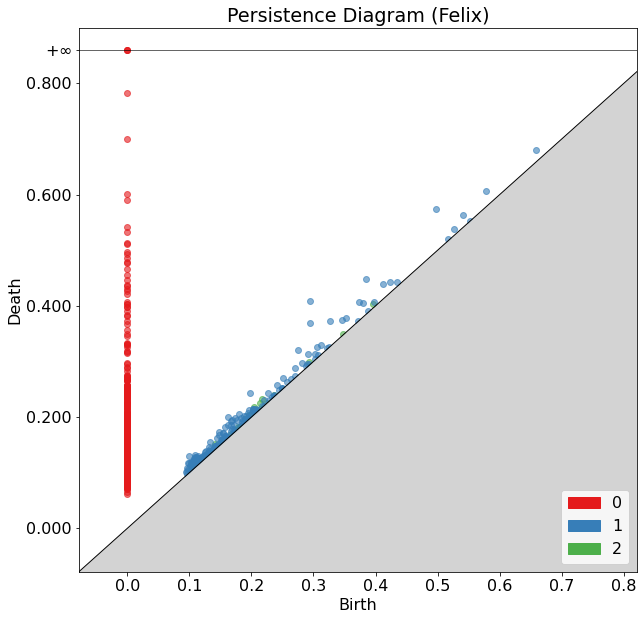

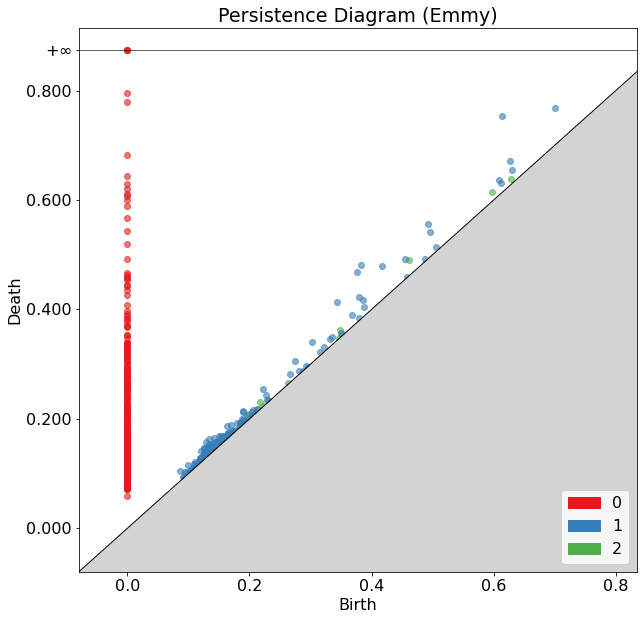

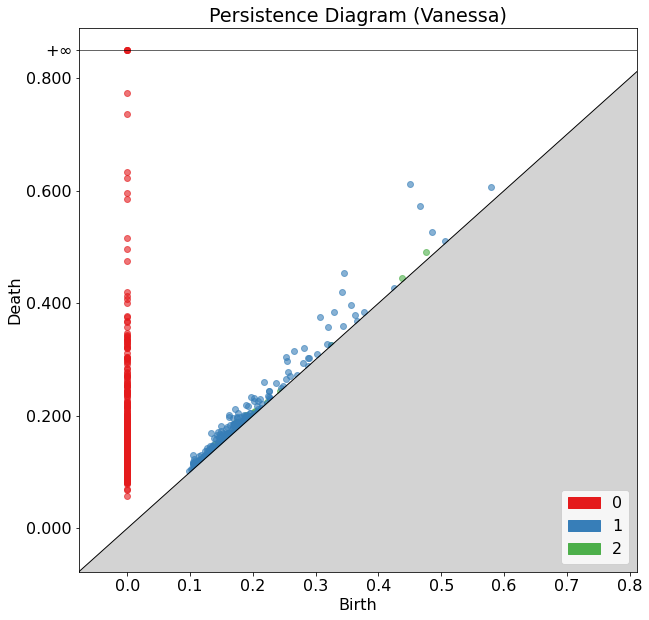

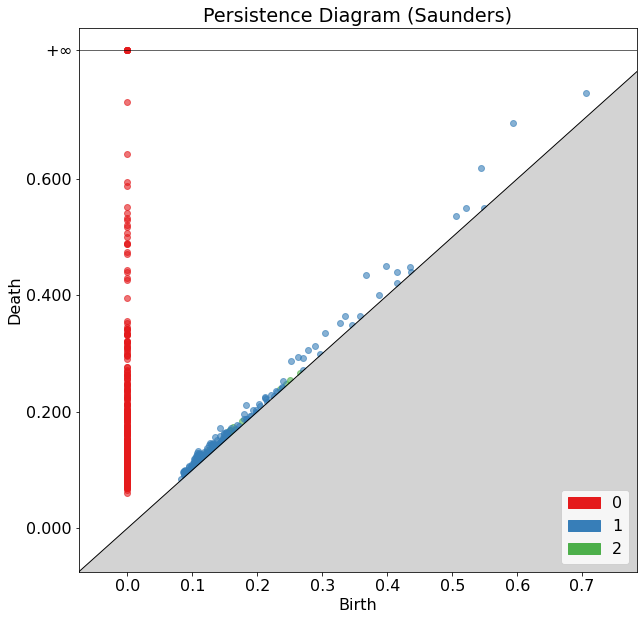

In [8]:
names_of_people = ['Felix', 'Emmy', 'Vanessa', 'Saunders']

for diagram, name in zip(persistence_diagrams, names_of_people):
    plot = gd.plot_persistence_diagram(diagram, legend=True)
    plot.set_title(f'Persistence Diagram ({name})')

Now the barcode diagrams:

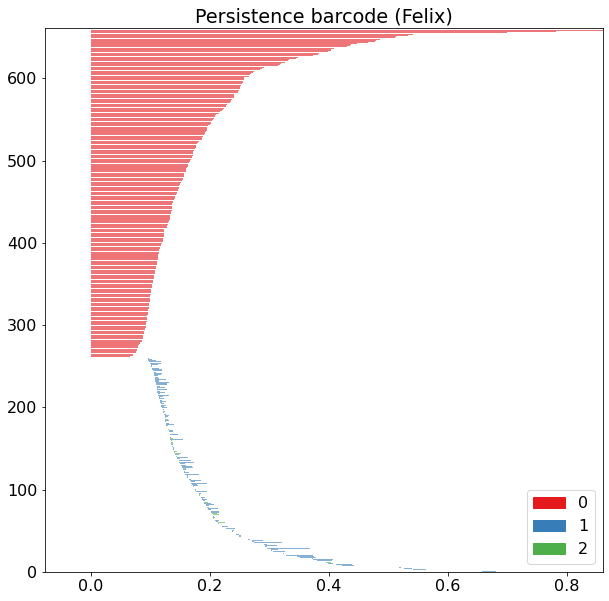

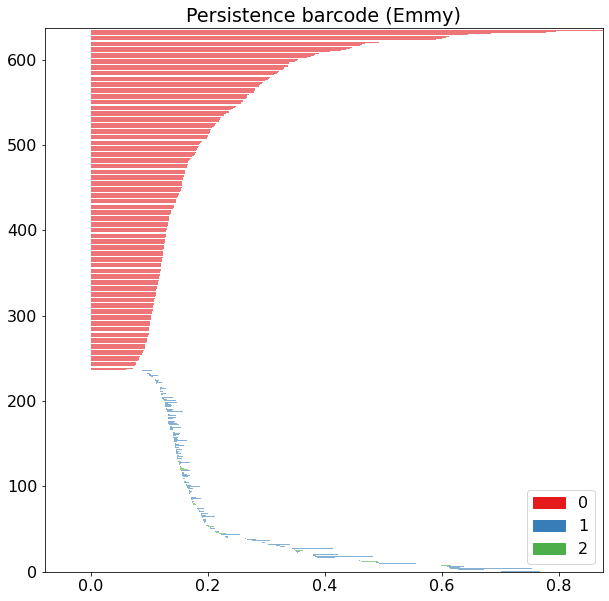

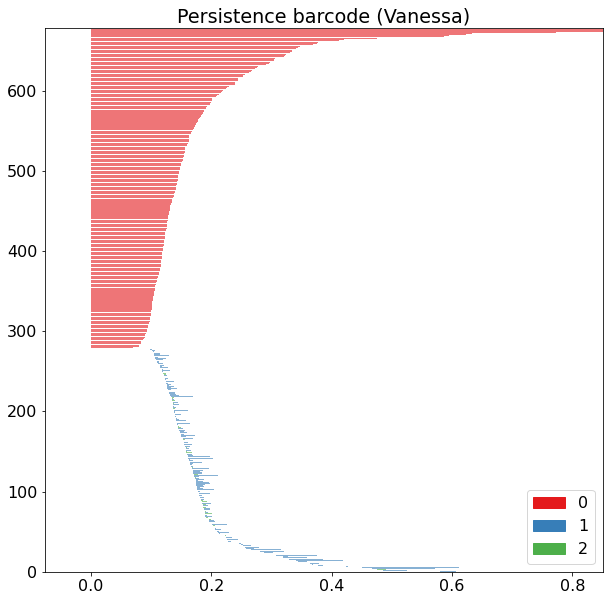

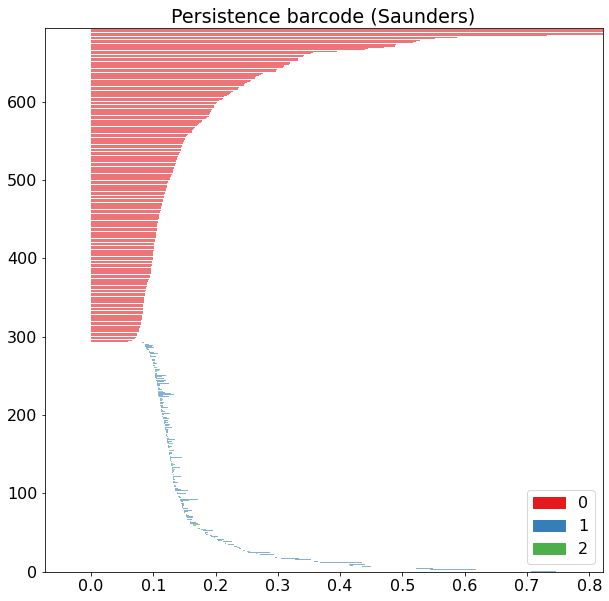

In [9]:
for diagram, name in zip(persistence_diagrams, names_of_people):
    plot = gd.plot_persistence_barcode(diagram, legend=True)
    plot.set_title(f'Persistence barcode ({name})')

## 3. Bottleneck Distance

Now we compute some bottleneck distances:

In [10]:
for dimension in range(max_dim):
    table = []
    header = ["Person 1", "Person 2", f'Distance ({dimension} Homology)']
    for i in range(len(names_of_people)):
        for j in range(i, len(names_of_people)):
            a = subjects_persistence_diagram_data[i][dimension]
            b = subjects_persistence_diagram_data[j][dimension]
            table_row = [f'{names_of_people[i]}', f'{names_of_people[j]}', str(gd.bottleneck_distance(a,b))]
            table.append(table_row)
    df = pd.DataFrame(table, columns=header)
    df.set_index(['Person 1', 'Person 2'])
    display(df)

,Person 1,Person 2,Distance (0 Homology)
0,Felix,Felix,8.13150114766611e-309
1,Felix,Emmy,0.10277400000000003
2,Felix,Vanessa,inf
3,Felix,Saunders,inf
4,Emmy,Emmy,8.264819105216004e-309
5,Emmy,Vanessa,inf
6,Emmy,Saunders,inf
7,Vanessa,Vanessa,1.0501691187595025e-308
8,Vanessa,Saunders,inf
9,Saunders,Saunders,7.69172104300959e-309


,Person 1,Person 2,Distance (1 Homology)
0,Felix,Felix,9.617440943667017e-309
1,Felix,Emmy,0.070025
2,Felix,Vanessa,0.051364000000000076
3,Felix,Saunders,0.05125999999999997
4,Emmy,Emmy,1.9601361970795895e-308
5,Emmy,Vanessa,0.070025
6,Emmy,Saunders,0.056831000000000076
7,Vanessa,Vanessa,1.319909614961518e-308
8,Vanessa,Saunders,0.07180300000000006
9,Saunders,Saunders,9.440512306575897e-309


,Person 1,Person 2,Distance (2 Homology)
0,Felix,Felix,2.0229011118297236e-308
1,Felix,Emmy,0.014787999999999996
2,Felix,Vanessa,0.007776499999999992
3,Felix,Saunders,0.007776499999999992
4,Emmy,Emmy,1.57109839237731e-308
5,Emmy,Vanessa,0.014787999999999996
6,Emmy,Saunders,0.014787999999999996
7,Vanessa,Vanessa,1.563490978869237e-308
8,Vanessa,Saunders,0.007433000000000023
9,Saunders,Saunders,2.1015949687233726e-308
